#### Import libraries

In [92]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
%matplotlib inline

## Import Data

In [93]:
df = pd.read_csv('Heart_Data.txt')
df.head()

,Age,Sex,ChestPain,BloodPressure,SerumCholestoral,FastingBloodSugar,RestingEKG,MaxHeartRate,ExerciseInducedAngina,STDepressionvsRest,DerivativeofPeakExerciseST,VesselsColoredbyFluoroscopy,Thal,HeartDisease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [94]:
df['HeartDisease'] = df['HeartDisease'].astype('category')

All the data is already in numerical format, and there are no categorical features so we can pass this data as is into a decision tree model for training.

In [95]:
X=df.drop(['HeartDisease'],axis=1)
y=df['HeartDisease']

### Train Decision Tree
Now we will train the decision tree on the entire set:

### Split into training/testing set

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [97]:
tree = DecisionTreeClassifier() #building the decision tree
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [98]:
y_pred=tree.predict(X_test)

### Evaluate model performance

In [99]:
acc = accuracy_score(y_test, y_pred)*100
print ('Model Accuracy: {}%'.format(round(acc,2)))

Model Accuracy: 62.96%


# Gradient Boosting classifier

In [100]:
model = GradientBoostingClassifier(n_estimators=400)
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=400,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [101]:
y_pred_gb= model.predict(X_test)

In [102]:
acc_gb= accuracy_score(y_test, y_pred_gb)*100
print ('Model Accuracy: {}%'.format(round(acc_gb,2)))

Model Accuracy: 77.78%


In [103]:
cm_dt = confusion_matrix(y_pred,y_test, labels=y.cat.categories)
print(cm_dt)

[[27 18]
 [12 24]]


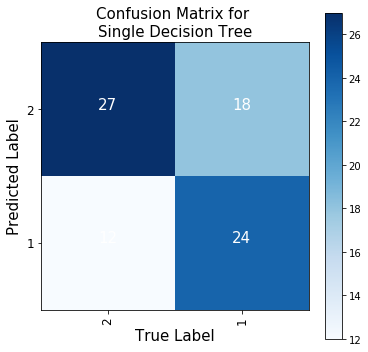

In [104]:
plt.figure(figsize=(6,6))
plt.imshow(cm_dt, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for \nSingle Decision Tree', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=90, fontsize=12)
plt.yticks(tick_marks, y.unique(), fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)
data='Visualising in a better way which '
for i in range(len(cm_dt)):
    for j in range(len(cm_dt[i])):
        color = 'black'   
        if cm_dt[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm_dt[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)

In [105]:
cm_gb = confusion_matrix(y_pred_gb,y_test, labels=y.cat.categories)
print(cm_gb)

[[33 12]
 [ 6 30]]


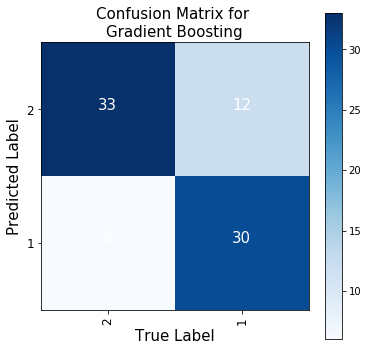

In [106]:
plt.figure(figsize=(6,6))
plt.imshow(cm_gb, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for \nGradient Boosting', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=90, fontsize=12)
plt.yticks(tick_marks, y.unique(), fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)
data='Visualising in a better way which '
for i in range(len(cm_gb)):
    for j in range(len(cm_gb[i])):
        color = 'black'   
        if cm_gb[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm_gb[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)

In [107]:
def bias(y_predict,y):
    y_predict = np.array(y_predict)
    y = np.array(y)
    return np.mean(np.power((y_predict-y),2))


#this function calculate the variance
def variance(y_predict,y):
    y_predict = np.array(y_predict)
    return np.var(y_predict)


In [114]:
bias_gb=[]
var_gb=[]
total_gb=[]
j=0
for k in range(1,100):  #range starts from 1 since since atleast 1 estimator is required for Gradient boosting regression
    model_gb = GradientBoostingClassifier(n_estimators=k)
    model_gb.fit(X_train,y_train)
    predictions_test = model_gb.predict(X_test) # X_train # X_test
    predictions_train = model_gb.predict(X_train) # X_train # X_test
  
    y_test_k=y_test
    y_predict_k=predictions_test
    bia_k = bias(y_predict_k,y_test_k)
    bias_gb.append(bia_k)
    var_k = variance(y_predict_k,y_test_k)
    var_gb.append(var_k)
    total_k = bia_k+var_k
    total_gb.append(total_k)

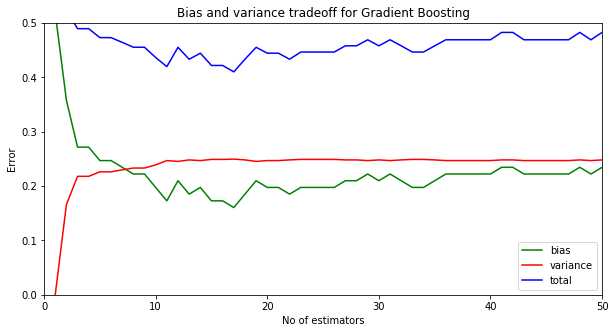

In [115]:
k=list(range(1,100))
plt.figure(figsize=(10, 5))
plt.plot(k, bias_gb,color='g',label="bias")
plt.plot(k, var_gb,color='r',label='variance')
plt.plot(k, total_gb,color='b',label='total')
plt.xlabel("No of estimators")
plt.ylabel("Error")
plt.title("Bias and variance tradeoff for Gradient Boosting")
plt.axis((0,50,0,0.5))
plt.legend()
plt.show()

# Hyperparameter Tuning

Tuning No of estimators

In [62]:
accuracy_ne=[]

n_estimator = [1, 2, 4, 8, 16, 32, 64, 100, 150, 200,250,300,400,500,600,750,900,1050]

for n_est in n_estimator:
    model_tuning_est = GradientBoostingClassifier(n_estimators=n_est,learning_rate=0.1)
    model_tuning_est.fit(X_train,y_train)
        
    pred_tune_est_test = model_tuning_est.predict(X_test)
    
    accuracy_ne.append(accuracy_score(y_test, pred_tune_est_test)*100)

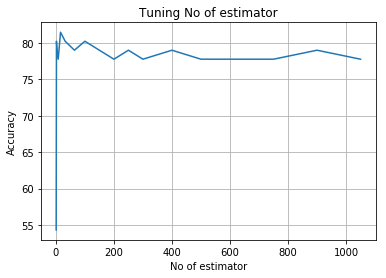

In [63]:
y=accuracy_ne
x=n_estimator
plt.plot(x, y)
plt.yscale('linear')
plt.xlabel('No of estimator')
plt.ylabel('Accuracy')
plt.title('Tuning No of estimator')
plt.grid(True)
plt.show()